In [1]:
# 1. Importamos las librerias necesarias 
import random 
import pandas as pd
import csv
import matplotlib.pyplot as plt


In [2]:
# 2. Inicializamos algunas variables 
hostnames=[]
dataset = []
df = None  # Se inicia con valor nulo 


In [3]:
# 3. Crear una función para generar los hostnames en base a unas reglas

def set_hostnames(number_of_hosts : int) -> None: 
    sistema_op = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1 # 40% Linux | 30% Solaris | 20% AIX | 10 % HP-UX
    entorno =  ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30 # 10% Development | 10% Integration | 25 % Testing | 25% Staging | 30% Production
    pais = ['NOR']*6 + ['FRA']* 9 + ['ITA']*16 + ['ESP']* 16 + ['DEU']*23 + ['IRL']*30 # 6% Norway | 9% France | 16% Italy | 16% Spain | 23 % Germany | 30 % Ireland
    grupo_beta = [] #cuando vayamos generando el código se incorpora aquí
    
    for i in range(number_of_hosts):
        hostname = random.choice(sistema_op) + random.choice(entorno) + random.choice(pais)
        grupo_beta.append(hostname)
        hostname += str(grupo_beta.count(hostname)).zfill(3) # lo convierte en 3 caracteres
        hostnames.append(hostname) # se añade a la lista hostnames
    
    
    



In [4]:
# 4. Creamos una función para obtener el nombre del sistema operativo
def get_os(hostname:str) -> str:
    if hostname.startswith('L'):
        return 'Linux'
    if hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknown'

In [5]:
def get_entorno(hostname: str) -> str:
    if hostname[1] == 'D':
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    
    else:
        return 'Unknown'

In [6]:
# 6. Creamos una función para obtener el nombre del país
def get_country(hostname: str) -> str:
    if hostname[2:5] == 'NOR':
        return 'Norway'
    elif hostname[2:5] == 'DEU':
        return 'Germany'
    elif hostname[2:5] == 'ITA':
        return 'Italy'
    elif hostname[2:5] == 'ESP':
        return 'Spain'
    elif hostname[2:5] == 'IRL':
        return 'Ireland'
    elif hostname[2:5] == 'FRA':
        return 'France'
    
    else:
        return 'Unknown'

In [7]:
# 7. Creamos una función para generar el DataFrame

def set_dataframe(count: int) -> None:
    global df 
    
    set_hostnames(count)

    for hostname in hostnames:
        dataset.append({
        'hostname' : hostname,
        'os' : get_os(hostname),
        'environment':get_entorno(hostname),
        'country': get_country(hostname),
        'node' : int(hostname[-3:])
        })
        
    df = pd.DataFrame(dataset)

In [8]:
set_dataframe(1500)

In [9]:
df.head(100)

,hostname,os,environment,country,node
0,LSITA001,Linux,Staging,Italy,1
1,LTDEU001,Linux,Testing,Germany,1
2,ASIRL001,AIX,Staging,Ireland,1
3,LSIRL001,Linux,Staging,Ireland,1
4,SSITA001,Solaris,Staging,Italy,1
...,...,...,...,...,...
95,SSESP002,Solaris,Staging,Spain,2
96,ADESP001,AIX,Development,Spain,1
97,LTDEU005,Linux,Testing,Germany,5
98,ADIRL001,AIX,Development,Ireland,1


In [10]:
# 9. Guardamos el DataFrame generado en un fichero CSV
df.to_csv('datasets/hosts.csv',
          header=True, 
          index=False)
hosts_df = pd.read_csv('hosts.csv')
hosts_df

,hostname,os,environment,country,node
0,SPDEU001,Solaris,Production,Germany,1
1,SSESP001,Solaris,Staging,Spain,1
2,SSDEU001,Solaris,Staging,Germany,1
3,ASESP001,AIX,Staging,Spain,1
4,ATIRL001,AIX,Testing,Ireland,1
...,...,...,...,...,...
1495,LSESP023,Linux,Staging,Spain,23
1496,LSDEU022,Linux,Staging,Germany,22
1497,HSDEU004,HP-UX,Staging,Germany,4
1498,LIESP010,Linux,Integration,Spain,10


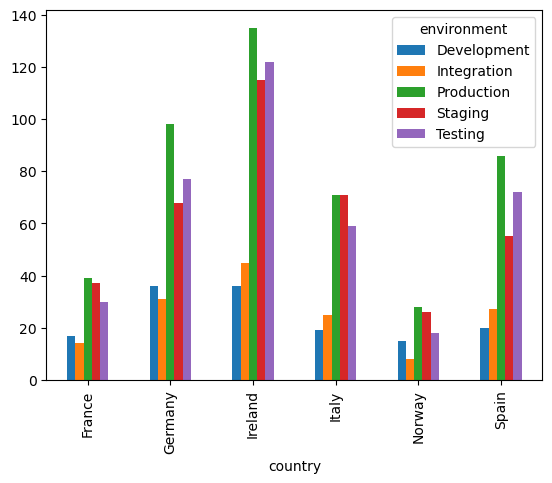

In [11]:
# 10. Generamos un único gráfico agrupando para cada país los entornos

hosts_environment = hosts_df.groupby(['country', 'environment']).size()
hosts_environment.unstack().plot(kind='bar')
plt.show()

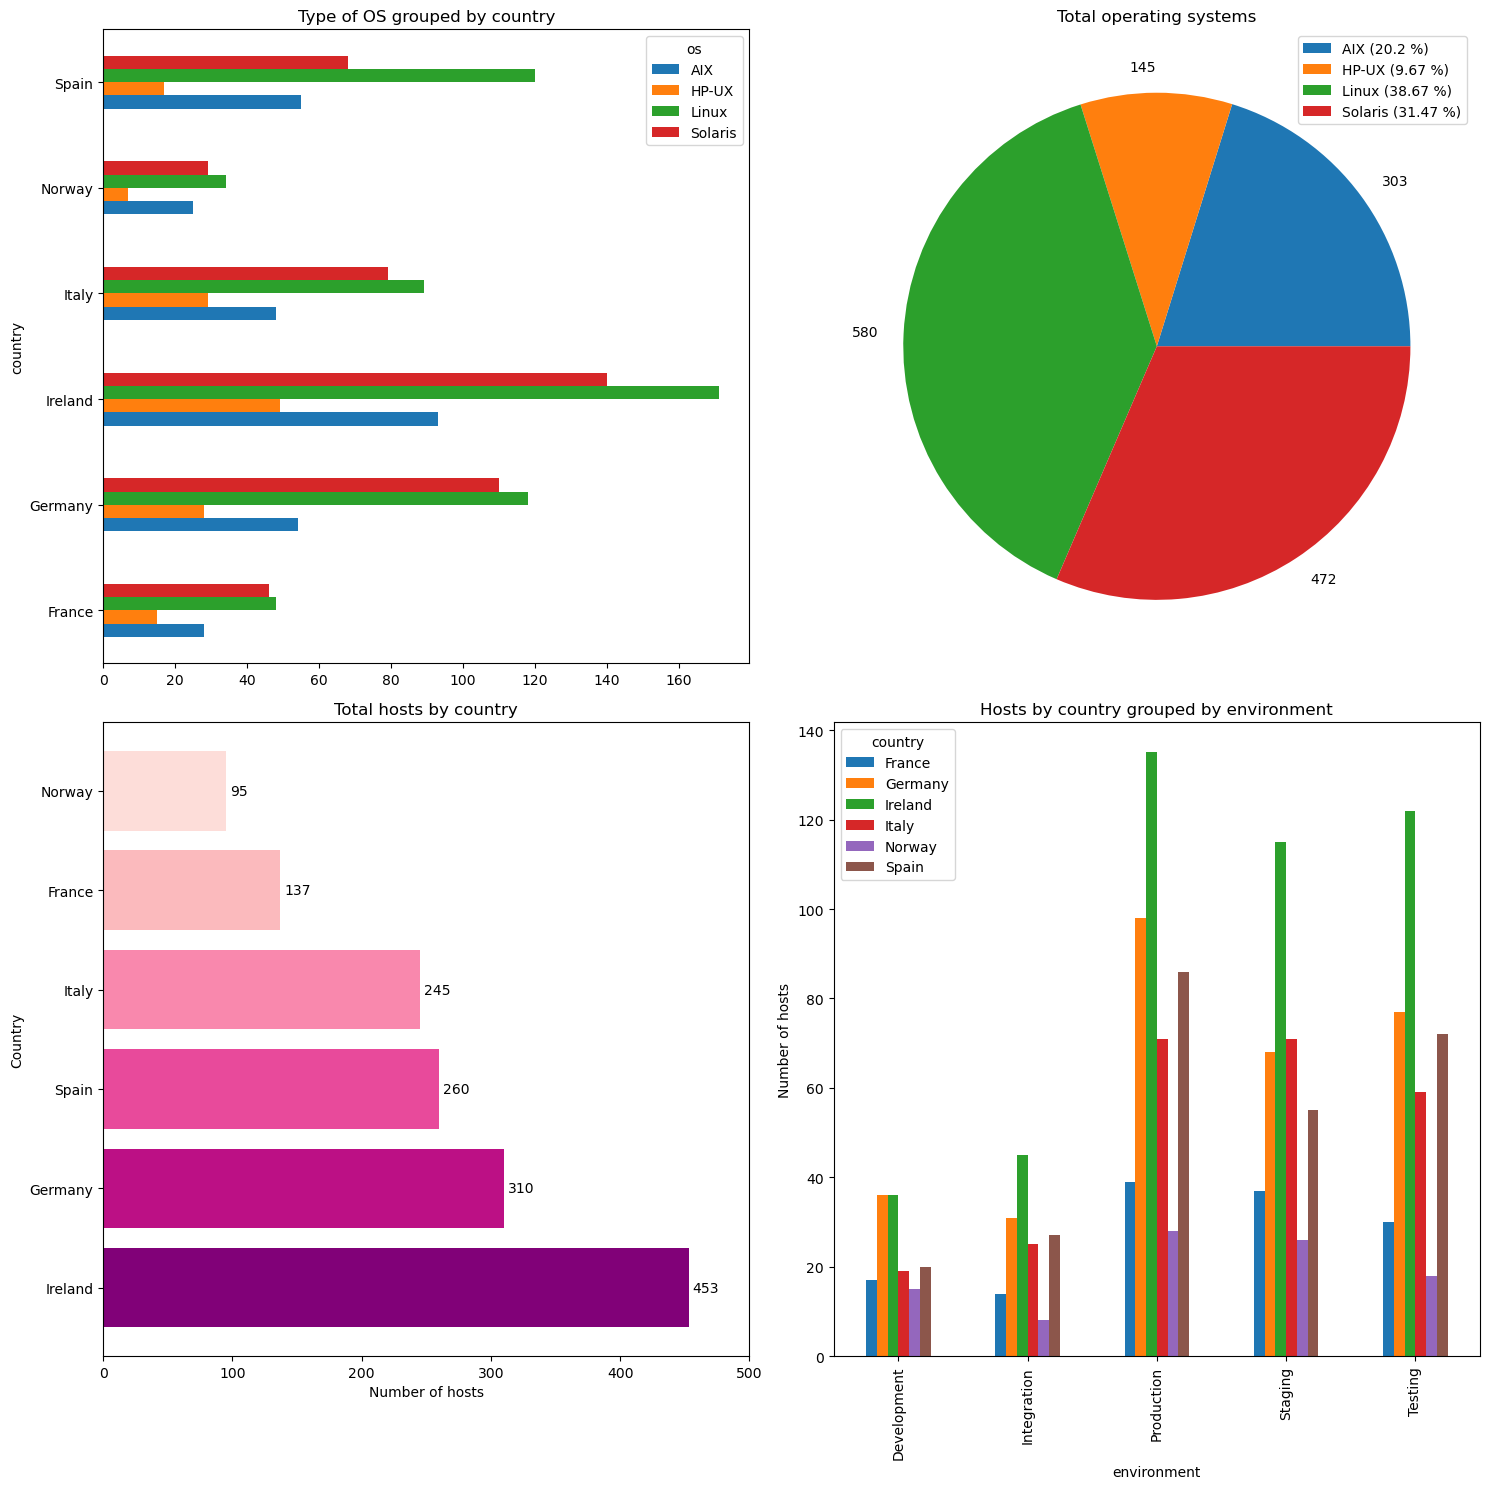

In [12]:
# 11. Creamos un gráfico con dos mallas y dos filas 
import seaborn as sns
import numpy as np

hosts_OS = hosts_df.groupby(['country', 'os']).size()
df_OS= hosts_df.groupby(['os']).size()
df_count= df_OS.value_counts()
df_percent= (df_OS / sum(df_OS) * 100)
df_percent = df_percent.round(2)
leyenda=[]
for os, percentage in zip(df_OS.index, df_percent):
    leyenda.append( os + ' (' + str(percentage) + ' %)')

country_count = hosts_df.value_counts('country')
hosts_environment= hosts_df.groupby(['environment', 'country']).size()



fig,axs = plt.subplots(2,2, figsize=(15,15))

hosts_OS.unstack().plot(kind='barh', ax=axs[0, 0])
axs[0,0].set_title('Type of OS grouped by country')


df_OS.plot(kind='pie', ax = axs[0,1], labels= df_count.index)
axs[0,1].set_title('Total operating systems') 
axs[0,1].legend(leyenda)

axs[1, 0].barh(country_count.index, country_count.values, color=sns.color_palette("RdPu")[::-1])
axs[1,0].set_title('Total hosts by country')
axs[1,0].set_xlabel('Number of hosts')
axs[1,0].set_ylabel('Country')
axs[1,0].set_xlim(right=500)
for i,  count in enumerate (country_count.values): # enumerate sirve para devolver el índice y los valores
    axs[1, 0].annotate(f'{count}', (count + 3, i), va='center', color='black')
    

hosts_environment.unstack().plot(kind='bar', ax= axs[1,1])
axs[1,1].set_title('Hosts by country grouped by environment')
axs[1,1].set_ylabel('Number of hosts')



fig.tight_layout()
